In [ ]:
# !pip install trimap

# ! pip install anndata  scanpy 

# !pip install matplotlib

In [6]:
import os

working_directory = '/mnt/data00/minghui/test-singlecell_method/'
os.chdir(working_directory)

# print("current work directory:", os.getcwd())


from scipy import io
import anndata as ad

import trimap
print(trimap.__version__)

import matplotlib
print(matplotlib.__version__)

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

import anndata as ad

/home/m833g/miniforge3/envs/mri_preproc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


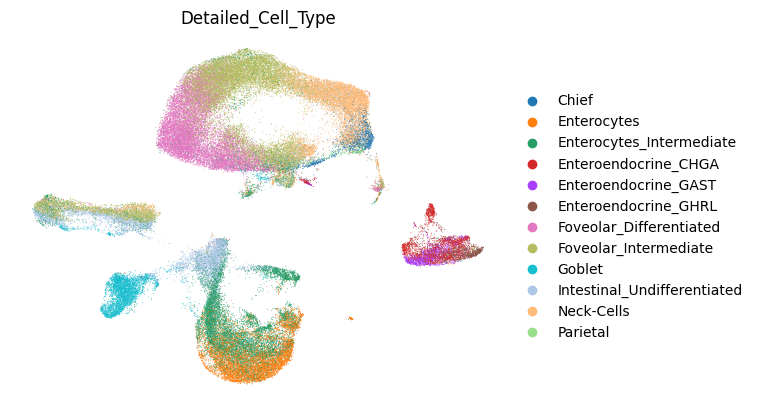

AnnData object with n_obs × n_vars = 79522 × 23867
    obs: 'Sample', 'Tissue_in_paper', 'Batch', 'Sample_Barcode', 'sum', 'detected', 'Study', 'Patient_type', 'Patient_status', 'MT.prop', 'sizeFactor', 'Global_cluster_selected', 'Celltypes_global', 'Tissuetypes_global', 'Detailed_Cell_Type', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'donor_id', 'Columnar_clusters', 'suspension_type', 'development_stage_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'sample_name', 'RNA_snn_res.0.5', 'seurat_clusters', 'nCount_RNA', 'nFeature_RNA', 'barcode', 'UMAP_1', 'UMAP_2'
    uns: 'Detailed_Cell_Type_colors'
    obsm: 'X_pca', 'X_umap'

In [13]:
import os
import numpy as np
import pandas as pd
from scipy import io
import anndata as ad
import scanpy as sc

working_directory = '/mnt/data00/minghui/test-singlecell_method/01_Test_ScType/'
os.chdir(working_directory)

X = io.mmread("SC_Columnar_counts.mtx")

# Create anndata object
adata = ad.AnnData(X=X.transpose().tocsr())

# cell metadata
cell_meta = pd.read_csv("SC_Columnar_metadata.csv")

# gene names
with open("SC_Columnar_gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()

adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

pca = pd.read_csv("SC_Columnar_pca.csv")
pca.index = adata.obs.index

adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

sc.pl.umap(adata, color=['Detailed_Cell_Type'], frameon=False, save=False)

adata.write('SC_Columnar_adata.h5ad')

adata


/home/m833g/miniforge3/envs/mri_preproc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


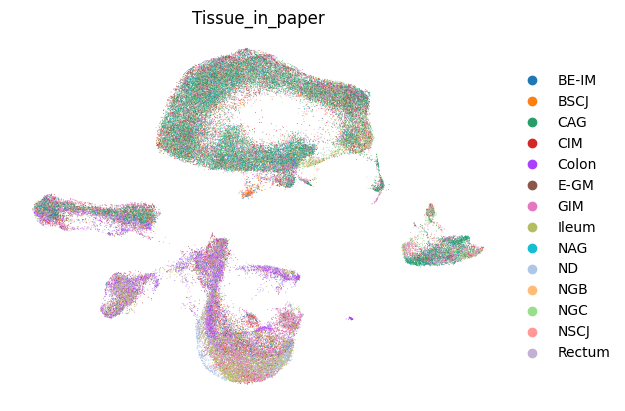

In [29]:
sc.pl.umap(adata, color=['Tissue_in_paper'], frameon=False, save=False)

In [ ]:
adata.obs['seurat_clusters'] = adata.obs['seurat_clusters'].astype('category')

/home/m833g/miniforge3/envs/mri_preproc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


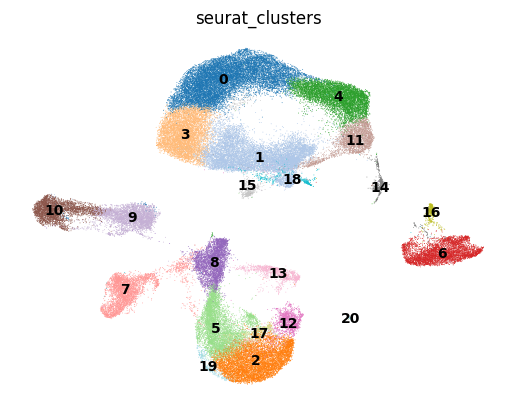

In [36]:
sc.pl.umap(adata, color=['seurat_clusters'],palette="tab20", frameon=False, legend_loc='on data',save=False)

# 修改代码  使眼色和这个代码画出的图显示颜色一致 

In [15]:
import anndata as ad
import numpy as np
import trimap

# adata = ad.read_h5ad("/mnt/data00/minghui/test-singlecell_method/01_Test_ScType/test.h5ad")

data = adata.X.toarray()  

embedding = trimap.TRIMAP().fit_transform(data)


In [5]:
# embedding = trimap.TRIMAP(n_inliers=20,
#                           n_outliers=10,
#                           n_random=10).fit_transform(data)

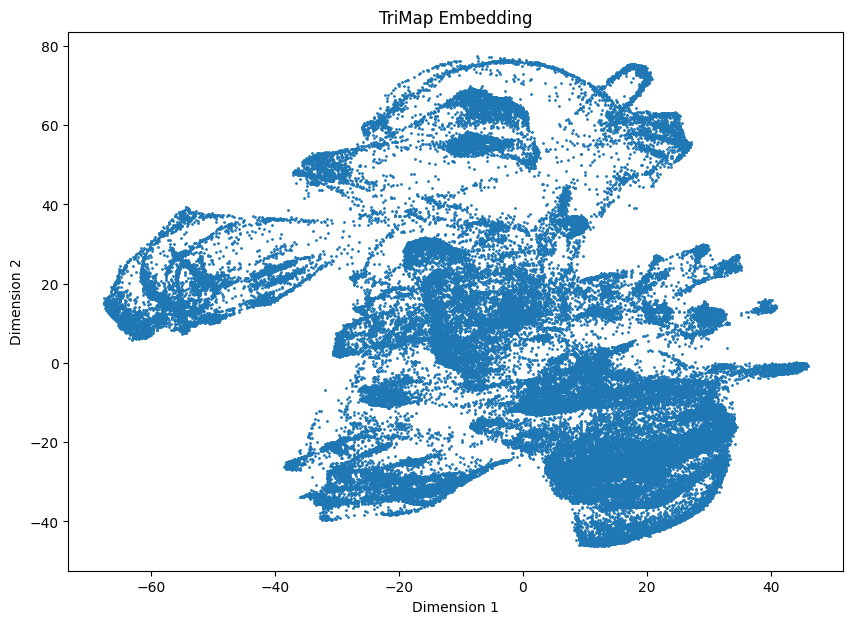

In [16]:
import matplotlib.pyplot as plt

# 4. Plot the embedding
plt.figure(figsize=(10, 7))
plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
plt.title("TriMap Embedding")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
# gs = trimap.TRIMAP(verbose=False).global_score(data, embedding)
# print("global score %2.2f" % gs)

In [ ]:
# 0.93

In [17]:
detailed_cell_type = adata.obs["Detailed_Cell_Type"]

unique_types = detailed_cell_type.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_types)))  

type_color_map = {cell_type: color for cell_type, color in zip(unique_types, colors)}

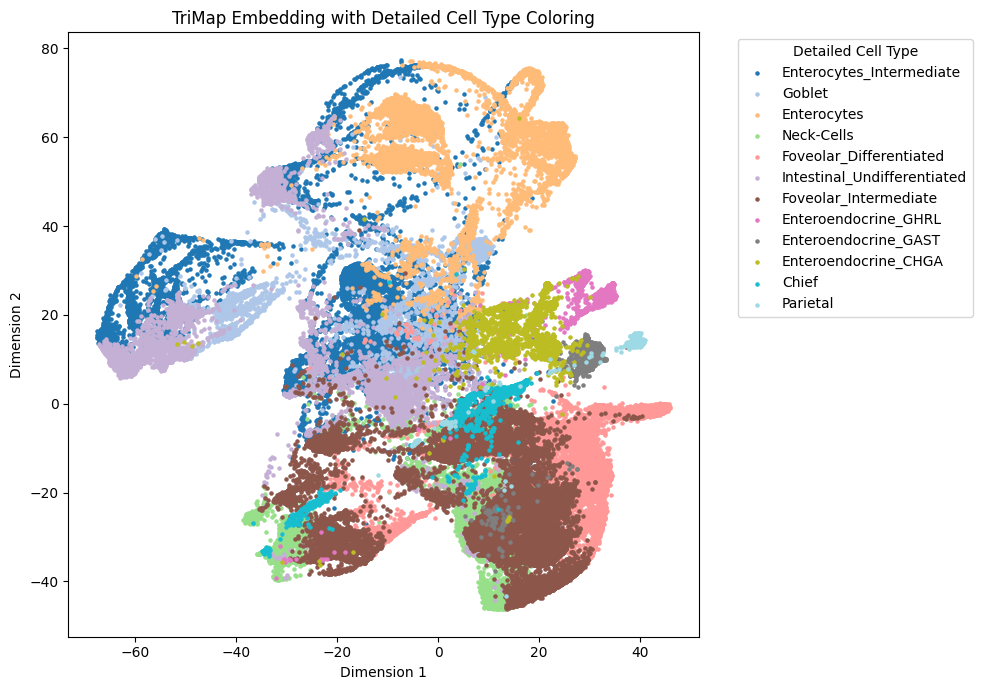

In [22]:
plt.figure(figsize=(10, 7))
for cell_type in unique_types:
    mask = detailed_cell_type == cell_type
    plt.scatter(embedding[mask, 0], embedding[mask, 1], s=5, color=type_color_map[cell_type], label=cell_type)

plt.title("TriMap Embedding with Detailed Cell Type Coloring")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Detailed Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

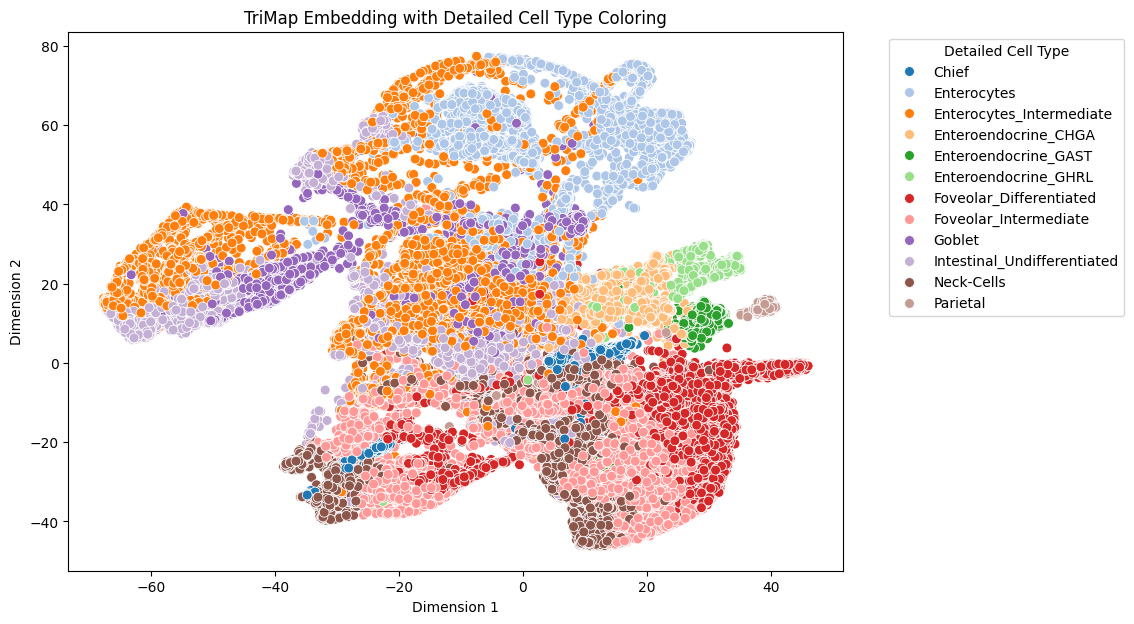

In [23]:
import pandas as pd
import seaborn as sns

# Create a DataFrame using pandas
df = pd.DataFrame({
    "Dimension 1": embedding[:, 0],
    "Dimension 2": embedding[:, 1],
    "Cell Type": detailed_cell_type
})

# Plot the embedding using seaborn and differentiate colors by cell type
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Cell Type", palette="tab20", s=50)
plt.title("TriMap Embedding with Detailed Cell Type Coloring")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Detailed Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

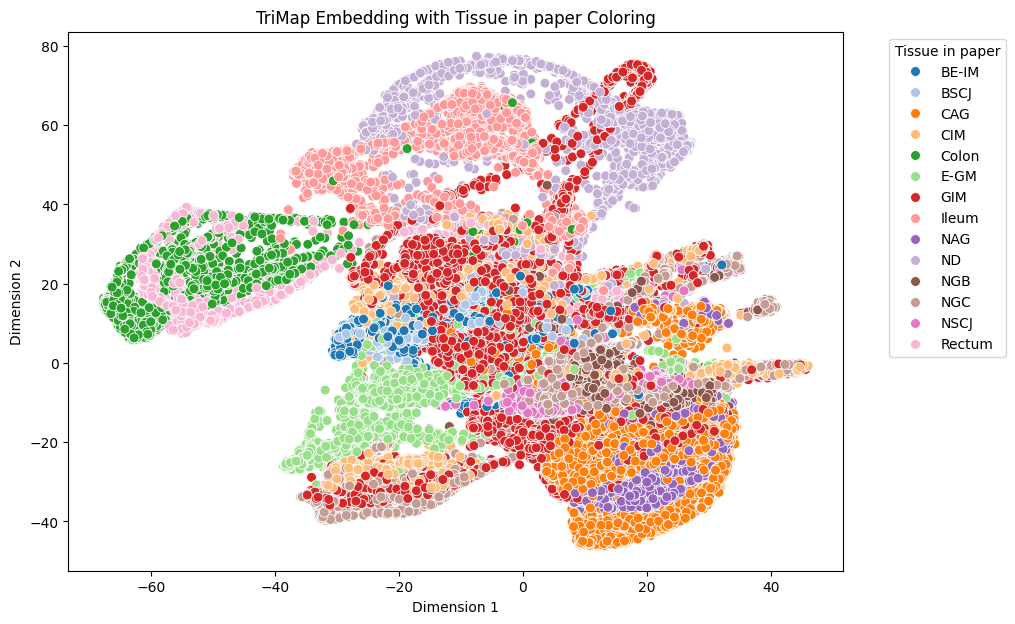

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have adata loaded as an AnnData object
Tissue_in_paper = adata.obs["Tissue_in_paper"]

# Create a DataFrame using pandas
df = pd.DataFrame({
    "Dimension 1": embedding[:, 0],
    "Dimension 2": embedding[:, 1],
    "Tissue in paper": Tissue_in_paper
})

# Plot the embedding using seaborn and differentiate colors by cell type
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Tissue in paper", palette="tab20", s=50)
plt.title("TriMap Embedding with Tissue in paper Coloring")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Tissue in paper", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


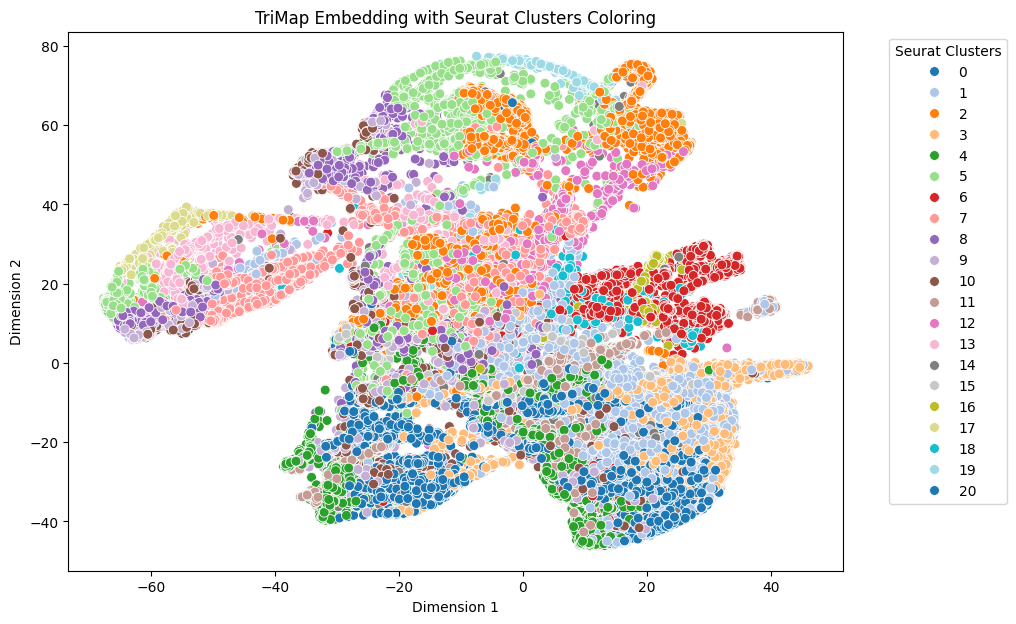

In [26]:
seurat_clusters = adata.obs["seurat_clusters"]

df = pd.DataFrame({
    "Dimension 1": embedding[:, 0],
    "Dimension 2": embedding[:, 1],
    "Seurat Clusters": seurat_clusters
})

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Seurat Clusters", palette="tab20", s=50)
plt.title("TriMap Embedding with Seurat Clusters Coloring")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Seurat Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

